# EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import phik

DEBUG = False
SEED = 666

## Load and format all the datasets

### Accounts dataset

#### Import test and train datasets

In [2]:
df_accounts_train = pd.read_csv(f"orig/accounts_train.csv")

In [3]:
df_accounts_test = pd.read_csv(f"orig/accounts_test.csv")

In [4]:
df_accounts_train.Account.value_counts()

Credit Card          6577
Current              5360
On Demand Deposit    2930
Deposit              2859
Investment           2700
Mortgage             2497
Loan                 1222
Joint                 867
Name: Account, dtype: int64

#### Function for formatting account datasets 

In [5]:
def format_accounts(df_accounts):
    print("Number of different Accounts : {} ".format(df_accounts.Account.nunique()))
    df_accounts = df_accounts.pivot_table(index='Customer', columns='Account', aggfunc='size', fill_value=0)
    df_accounts.drop(['Credit Card'], axis=1, inplace=True)

    print(df_accounts.shape)
    print("Number of NANs : {}".format(df_accounts.isna().sum().sum()))

    return df_accounts

#### Formatting train dataset

In [6]:
df_accounts_train = format_accounts(df_accounts_train)
df_accounts_train.head(1)

Number of different Accounts : 8 
(6577, 7)
Number of NANs : 0


Account,Current,Deposit,Investment,Joint,Loan,Mortgage,On Demand Deposit
Customer,,,,,,,
708115009,0,0,0,0,0,0,0


#### Formatting test dataset

In [7]:
df_accounts_test = format_accounts(df_accounts_test)
df_accounts_test.head(1)

Number of different Accounts : 8 
(3542, 7)
Number of NANs : 0


Account,Current,Deposit,Investment,Joint,Loan,Mortgage,On Demand Deposit
Customer,,,,,,,
708182832,1,1,1,0,0,0,0


#### Comments
- The format_accounts function formats the datframe so that each customer only has one entry.
- Each entry now has a coumn for each account type with true and false.
- The cusomer number is now used as the index for the dataframe.
- Drop the credit card column as eecery customer has a credit card.

### Customers Dataset

#### Import test and train datasets

In [8]:
df_customers_train = pd.read_csv(f"orig/customers_train.csv")

In [9]:
df_customers_test = pd.read_csv(f"orig/customers_test.csv")

In [10]:
df_customers_train.Card.value_counts()

Silver      6144
Gold         345
Platinum      74
Black         14
Name: Card, dtype: int64

In [11]:
df_customers_train.Education.value_counts()

Graduate         2025
Second level     1338
Unknown           981
Primary level     944
Post LC           646
MSc               343
PhD               300
Name: Education, dtype: int64

In [12]:
df_customers_train.Income.value_counts()

Less than €30K    2321
€30K - €50K       1164
€80K - €100K       958
€50K - €80K        930
Unknown            739
€100K +            465
Name: Income, dtype: int64

#### Function for formatting account dataset 

In [13]:
def format_customers(df_customers):
    # Date split was unecessary as Loyalty feature yielded better results
    #df_customers[['Start_Year', 'Start_Day', 'Start_Month']] = df_customers['Start_Date'].str.split('-', expand=True)
    #print("Unique Start Months : {} ".format(df_customers.Start_Month.nunique()))
    #df_customers.drop(['Start_Date','Start_Month'], axis=1, inplace=True)
    
    card_levels = {'Silver': 1, 'Gold': 2, 'Platinum': 3, 'Black': 4}
    df_customers['Card'] = df_customers['Card'].map(card_levels)
    
    education_levels = {'MSc':7, 'PhD':6, 'Graduate':5, 'Post LC':4, 'Second level':3,
                        'Primary level' : 2, 'Unknown':1}
    df_customers['Education'] = df_customers['Education'].map(education_levels)
    
    
    income_levels = {'Unknown':0, 'Less than €30K':1, '€30K - €50K':2,'€50K - €80K':3, 
                     '€80K - €100K':4, '€100K +':5}
    df_customers['Income'] = df_customers['Income'].map(income_levels)
    
    df_customers = df_customers.set_index('Customer')

    print(df_customers.shape)
    print("Number of NANs : {}".format(df_customers.isna().sum().sum()))
    
    return df_customers

#### Formatting train dataset

In [14]:
df_customers_train = format_customers(df_customers_train)
#df_customers_train.Churn = df_customers_train.Churn.astype(bool)
df_customers_train.head(1)
#df_customers_train.Marital_Status.nunique()

(6577, 14)
Number of NANs : 761


,Churn,Card,Start_Date,Customer_Service_Calls,Credit_Limit,Total_Revolving_Balance,Average_Open_To_Buy,Average_Utilisation_Ratio,Age,Gender,Education,Marital_Status,Dependents,Income
Customer,,,,,,,,,,,,,,
797197508,No,1,2020-06-01,1,2315.0,1565,750.0,0.676,48.0,F,5,Married,2,1


#### Formatting test dataset

In [15]:
df_customers_test = format_customers(df_customers_test)
df_customers_test.head(1)
#df_customers_test.Marital_Status.nunique()

(3542, 13)
Number of NANs : 0


,Card,Start_Date,Customer_Service_Calls,Credit_Limit,Total_Revolving_Balance,Average_Open_To_Buy,Average_Utilisation_Ratio,Age,Gender,Education,Marital_Status,Dependents,Income
Customer,,,,,,,,,,,,,
774663629,2,2020-01-01,2,29663.0,1743,27920.0,0.059,51,M,5,Single,3,3


#### Cleaning NANs in training data

In [16]:
df_customers_train.dropna(inplace=True)
print("Number of NANs : {}".format(df_customers_train.isna().sum().sum()))
print(df_customers_train.shape)
df_customers_train.head(5)

Number of NANs : 0
(5831, 14)


,Churn,Card,Start_Date,Customer_Service_Calls,Credit_Limit,Total_Revolving_Balance,Average_Open_To_Buy,Average_Utilisation_Ratio,Age,Gender,Education,Marital_Status,Dependents,Income
Customer,,,,,,,,,,,,,,
797197508,No,1,2020-06-01,1,2315.0,1565,750.0,0.676,48.0,F,5,Married,2,1
812854728,No,1,2020-01-01,1,7645.0,2076,5569.0,0.272,58.0,F,3,Single,5,1
768000743,No,1,2020-01-01,2,6394.0,0,6394.0,0.000,55.0,F,3,Single,2,1
759029725,No,1,2021-02-01,4,1879.0,1486,393.0,0.791,37.0,F,3,Single,1,1
764982590,No,1,2018-10-01,4,6036.0,1409,4627.0,0.233,56.0,M,6,Married,2,3


#### Comment
- Test dataset has one more marital status - Unknown
- We will add this to the marital status category after we transform all the object types to categories
- The Start Date has been broken down to start year,month and day.
- It was then noticed that the start month only had one unique value so it could be dropped.
- The customer number was also set as the index for the datframe here.
- Training data had qute a few NA values, seeming as the dataframe is has ~6500 entries simply removing the entries with NA values shouldnt cause any issues.

### Transactions Dataset

#### Import test and train datasets

In [17]:
df_transaction_train = pd.read_csv(f"orig/transactions_train.csv")
df_transaction_train.head(1)

,Customer,Date,Amount
0,828247016,2022-03-01,70.94


In [18]:
df_transaction_test = pd.read_csv(f"orig/transactions_test.csv")

#### Function for formatting transaction dataset 

In [19]:
def format_transactions(df_transaction):
    df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

    df_transaction['Month'] = df_transaction['Date'].dt.month

    df_transaction_grouped = df_transaction.groupby(['Customer', 'Month'])['Amount'].sum().reset_index()

    df_transaction_pivot = df_transaction_grouped.pivot(index='Customer', columns='Month', values='Amount').reset_index()

    df_transaction_pivot.columns = ['Customer', 'Jan_Total', 'Feb_Total', 'Mar_Total', 'Apr_Total', 'May_Total', 'Jun_Total', 'Jul_Total', 'Aug_Total', 'Sep_Total', 'Oct_Total', 'Nov_Total', 'Dec_Total']

    df_transaction = df_transaction_pivot.set_index('Customer')

    df_transaction = df_transaction.fillna(0)
    
    return df_transaction

In [20]:
def format_transactions2(df_transaction):
    df_transaction = df_transaction.groupby('Customer').agg({'Amount': ['sum', 'mean'], 'Date': 'count'})
    

    df_transaction.columns = ['_'.join(col).capitalize() for col in df_transaction.columns.values]
    

    df_transaction = df_transaction.rename(columns={'Amount_sum': 'Total_Transactions', 
                                                    'Amount_mean': 'Avg_Transaction', 
                                                    'Date_count': 'Num_Transactions'})
    
    return df_transaction

#### Formatting train dataset

In [21]:
df_transaction_train = format_transactions2(df_transaction_train)
df_transaction_train.head(5)

,Total_Transactions,Avg_Transaction,Num_Transactions
Customer,,,
708115009,1886.99,52.416389,36
708117651,7400.03,86.046860,86
708163600,13299.99,127.884519,104
708166361,4107.99,57.055417,72
708169780,4539.95,58.204487,78


#### Formatting test dataset

In [22]:
df_transaction_test = format_transactions2(df_transaction_test)
df_transaction_test.head(5)

,Total_Transactions,Avg_Transaction,Num_Transactions
Customer,,,
708182832,4341.01,67.828281,64
708240660,2349.01,57.292927,41
708249778,2120.98,35.349667,60
708259785,15195.00,125.578512,121
708264579,1302.02,36.167222,36


#### Comments
- The first format function
 - Set the customer number as the index
 - Create a single entry for each customer with total transactions for each month
 - This created too many features and didnt give great recall scores
- The second format function
 - Set the customer numbr as the index
 - Create a single entry for each custome woth total transactions, avg transactions and total number of transactions
 - This gave better scores than the 1st as it used alot less features

## Merge Datasets

### Merge train

In [23]:
df_train = pd.merge(df_accounts_train, df_customers_train, left_index=True, right_index=True)
df_train = pd.merge(df_train, df_transaction_train, left_index=True, right_index=True)
print(df_train.shape)
df_train.head(3)

(5831, 24)


,Current,Deposit,Investment,Joint,Loan,Mortgage,On Demand Deposit,Churn,Card,Start_Date,...,Average_Utilisation_Ratio,Age,Gender,Education,Marital_Status,Dependents,Income,Total_Transactions,Avg_Transaction,Num_Transactions
Customer,,,,,,,,,,,,,,,,,,,,,
708115009,0,0,0,0,0,0,0,Yes,1,2020-02-01,...,0.000,47.0,F,1,Single,3,1,1886.99,52.416389,36
708117651,1,0,0,0,0,0,0,No,1,2020-04-01,...,0.000,39.0,F,3,Single,3,1,7400.03,86.046860,86
708163600,1,0,0,0,0,0,1,No,1,2019-12-01,...,0.569,49.0,F,2,Married,4,1,13299.99,127.884519,104


### Merge test

In [24]:
df_test = pd.merge(df_accounts_test, df_customers_test, left_index=True, right_index=True)
df_test = pd.merge(df_test, df_transaction_test, left_index=True, right_index=True)
print(df_test.shape)
df_test.head(3)

(3542, 23)


,Current,Deposit,Investment,Joint,Loan,Mortgage,On Demand Deposit,Card,Start_Date,Customer_Service_Calls,...,Average_Utilisation_Ratio,Age,Gender,Education,Marital_Status,Dependents,Income,Total_Transactions,Avg_Transaction,Num_Transactions
Customer,,,,,,,,,,,,,,,,,,,,,
708182832,1,1,1,0,0,0,0,1,2021-01-01,1,...,0.513,37,F,5,Single,2,2,4341.01,67.828281,64
708240660,1,1,1,0,1,0,0,1,2020-01-01,3,...,0.606,26,M,4,Single,0,2,2349.01,57.292927,41
708249778,1,0,1,0,0,1,0,1,2020-09-01,2,...,0.448,35,F,4,Single,1,0,2120.98,35.349667,60


#### Comments
 Datasets were mereged on index by using the customer number as the index value

## Feature Engineering

interval columns not set, guessing: ['Current', 'Deposit', 'Investment', 'Joint', 'Loan', 'Mortgage', 'On Demand Deposit', 'Card', 'Customer_Service_Calls', 'Credit_Limit', 'Total_Revolving_Balance', 'Average_Open_To_Buy', 'Average_Utilisation_Ratio', 'Age', 'Education', 'Dependents', 'Income', 'Total_Transactions', 'Avg_Transaction', 'Num_Transactions']


<AxesSubplot:title={'center':'Phiks'}>

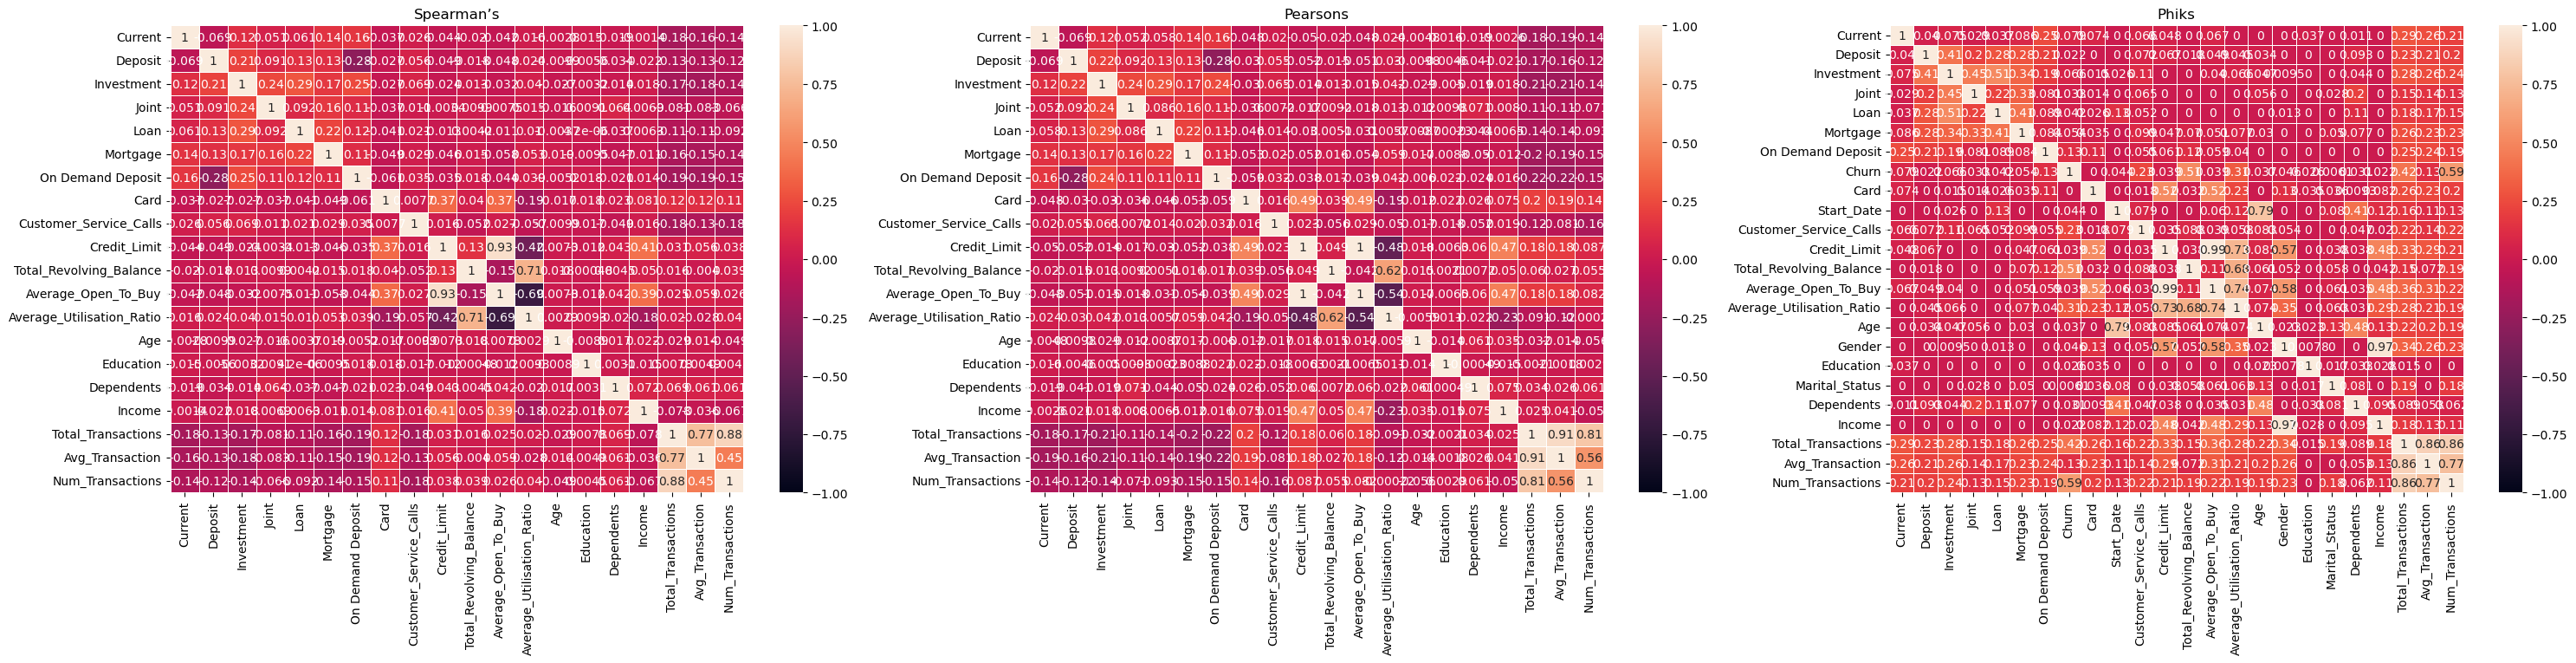

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 7))
plt.subplots_adjust(right=2)

columns = df_train.columns.values
SpearCorr = df_train[columns].corr(method='spearman')

ax1.set_title("Spearman’s")
sns.heatmap( SpearCorr, annot=True, vmin=-1 , vmax=1 , linewidths=0.5 , ax=ax1)

PearsonCorr = df_train[columns].corr()
ax2.set_title("Pearsons")
sns.heatmap(PearsonCorr, annot=True, vmin=-1 , vmax=1 , linewidths=0.5 , ax=ax2)

PhikCorr = df_train[columns].phik_matrix()
ax3.set_title("Phiks")
sns.heatmap(PhikCorr, annot=True, vmin=-1 , vmax=1 , linewidths=0.5 , ax=ax3)

##### Comments 
- Average_Utilisation_Rate and Gender have high correlations with other features so they will be dropped from the dataframes
- Start Year and Stary Date are categorical and have corelation between eachother so I will replace this with a new feature Loyalty which counts the number of days the customer has been with us.

### Drop High Corelation Features

In [26]:
df_train = df_train.drop(['Average_Utilisation_Ratio','Gender','Avg_Transaction'], axis=1)
df_test = df_test.drop(['Average_Utilisation_Ratio','Gender','Avg_Transaction'], axis=1)

In [27]:
### New Feature Loyalty

def calculate_loyalty(df):
    # Convert the registration date column to a datetime object
    df['Start_Date'] = pd.to_datetime(df['Start_Date'])

    # Calculate the number of days since registration
    now = datetime.now()
    df['Loyalty'] = (now - df['Start_Date']).dt.days

    # Drop the original registration date column
    df = df.drop(columns=['Start_Date'])

    return df

In [28]:
df_train = calculate_loyalty(df_train)
df_test = calculate_loyalty(df_test)

df_train.head(3)

,Current,Deposit,Investment,Joint,Loan,Mortgage,On Demand Deposit,Churn,Card,Customer_Service_Calls,...,Total_Revolving_Balance,Average_Open_To_Buy,Age,Education,Marital_Status,Dependents,Income,Total_Transactions,Num_Transactions,Loyalty
Customer,,,,,,,,,,,,,,,,,,,,,
708115009,0,0,0,0,0,0,0,Yes,1,3,...,0,5398.0,47.0,1,Single,3,1,1886.99,36,1159
708117651,1,0,0,0,0,0,0,No,1,2,...,0,1621.0,39.0,3,Single,3,1,7400.03,86,1099
708163600,1,0,0,0,0,0,1,No,1,1,...,1817,1379.0,49.0,2,Married,4,1,13299.99,104,1221


## Clean

### Summarise dataset
- Double checking feature value types, null counts and etc...

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5831 entries, 708115009 to 828317722
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Current                  5831 non-null   int64  
 1   Deposit                  5831 non-null   int64  
 2   Investment               5831 non-null   int64  
 3   Joint                    5831 non-null   int64  
 4   Loan                     5831 non-null   int64  
 5   Mortgage                 5831 non-null   int64  
 6   On Demand Deposit        5831 non-null   int64  
 7   Churn                    5831 non-null   object 
 8   Card                     5831 non-null   int64  
 9   Customer_Service_Calls   5831 non-null   int64  
 10  Credit_Limit             5831 non-null   float64
 11  Total_Revolving_Balance  5831 non-null   int64  
 12  Average_Open_To_Buy      5831 non-null   float64
 13  Age                      5831 non-null   float64
 14  Education  

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3542 entries, 708182832 to 828331426
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Current                  3542 non-null   int64  
 1   Deposit                  3542 non-null   int64  
 2   Investment               3542 non-null   int64  
 3   Joint                    3542 non-null   int64  
 4   Loan                     3542 non-null   int64  
 5   Mortgage                 3542 non-null   int64  
 6   On Demand Deposit        3542 non-null   int64  
 7   Card                     3542 non-null   int64  
 8   Customer_Service_Calls   3542 non-null   int64  
 9   Credit_Limit             3542 non-null   float64
 10  Total_Revolving_Balance  3542 non-null   int64  
 11  Average_Open_To_Buy      3542 non-null   float64
 12  Age                      3542 non-null   int64  
 13  Education                3542 non-null   int64  
 14  Marital_Sta

#### Comments
Issues:
 - Card,Gender,Education,Marital_Status,Income can be encoded to catgerical values

### Encoding Object Values

#### All features with object data types

In [31]:
for c in df_train.columns:
    if df_train[c].dtype == "object":
        df_train[c] = pd.Categorical(df_train[c])

In [32]:
for c in df_test.columns:
    if df_test[c].dtype == "object":
        df_test[c] = pd.Categorical(df_test[c])

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5831 entries, 708115009 to 828317722
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Current                  5831 non-null   int64   
 1   Deposit                  5831 non-null   int64   
 2   Investment               5831 non-null   int64   
 3   Joint                    5831 non-null   int64   
 4   Loan                     5831 non-null   int64   
 5   Mortgage                 5831 non-null   int64   
 6   On Demand Deposit        5831 non-null   int64   
 7   Churn                    5831 non-null   category
 8   Card                     5831 non-null   int64   
 9   Customer_Service_Calls   5831 non-null   int64   
 10  Credit_Limit             5831 non-null   float64 
 11  Total_Revolving_Balance  5831 non-null   int64   
 12  Average_Open_To_Buy      5831 non-null   float64 
 13  Age                      5831 non-null   float64 


### Adding missing martial status value as mentioned before

In [34]:
df_train.Marital_Status = df_train.Marital_Status.cat.add_categories(['Unknown'])
print(df_train.Marital_Status.cat.categories)

Index(['Divorced', 'Married', 'Single', 'Unknown'], dtype='object')


### Check nans

In [35]:
df_train.isna().sum().sum()

0

In [36]:
df_test.isna().sum().sum()

0

## Save test and train datasets

In [37]:
df_train.to_pickle("./orig/data/churn_train.pkl")

In [38]:
df_test.to_pickle("./orig/data/churn_test.pkl")